In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("Data/HR_comma_sep.csv")

In [3]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


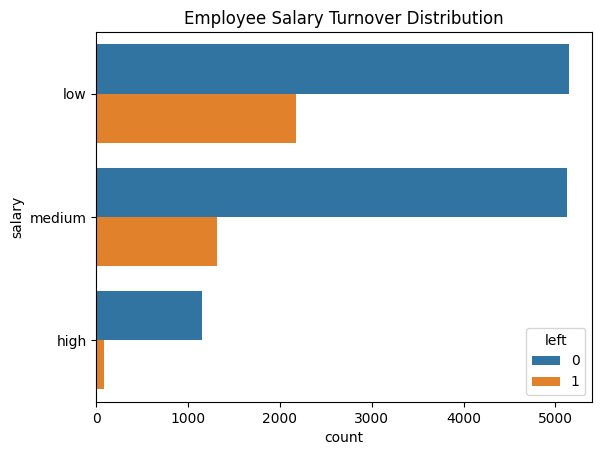

In [5]:
sns.countplot(y="salary", hue='left', data=data).set_title('Employee Salary Turnover Distribution');

C:\Users\Obaid\AppData\Local\Temp\ipykernel_11268\2832513550.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salary', y='left', data=data, palette='Pastel2')


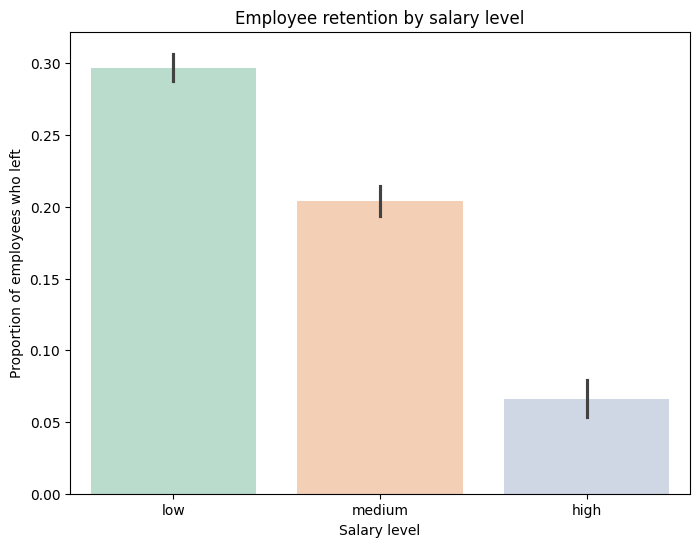

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x='salary', y='left', data=data, palette='Pastel2')
plt.title('Employee retention by salary level')
plt.xlabel('Salary level')
plt.ylabel('Proportion of employees who left')
plt.show()

C:\Users\Obaid\AppData\Local\Temp\ipykernel_11268\3493034248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='left', data=data,palette='Set2')


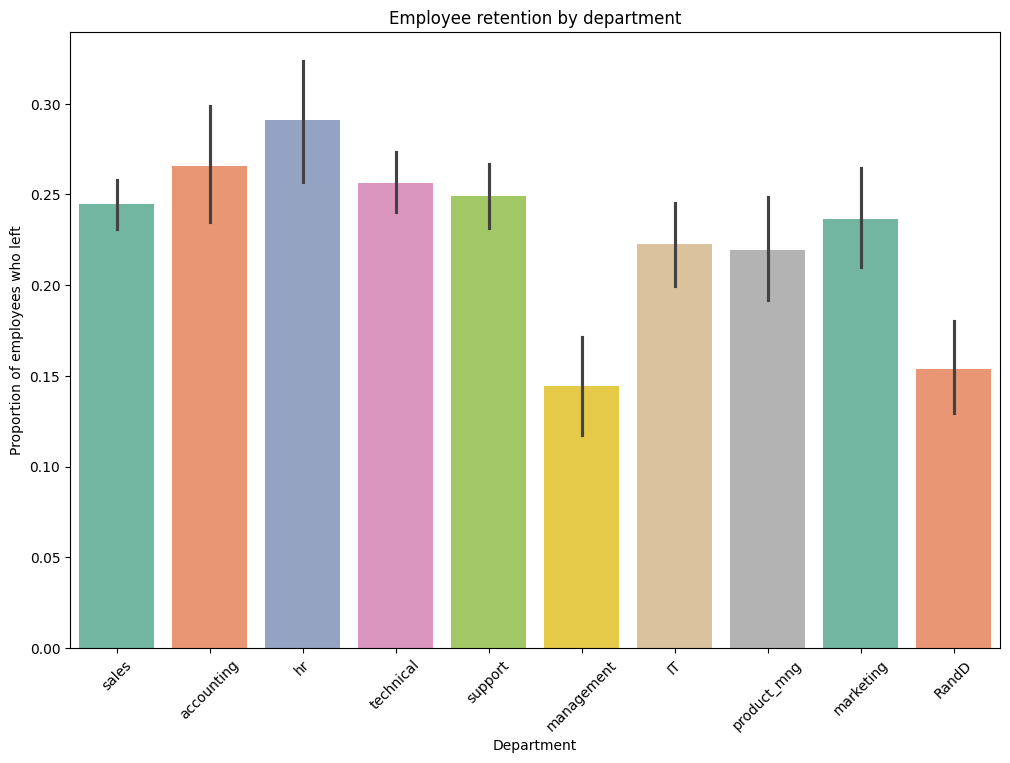

In [7]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='left', data=data,palette='Set2')
plt.title('Employee retention by department')
plt.xlabel('Department')
plt.ylabel('Proportion of employees who left')
plt.xticks(rotation=45)
plt.show()

In [8]:
df_numeric = data

In [9]:
label_encoder = LabelEncoder()
df_numeric['salary_encoded'] = label_encoder.fit_transform(df_numeric['salary'])
df_numeric['Department_encoded'] = label_encoder.fit_transform(df_numeric['Department'])

In [10]:
df_numeric = data.select_dtypes(exclude='object')

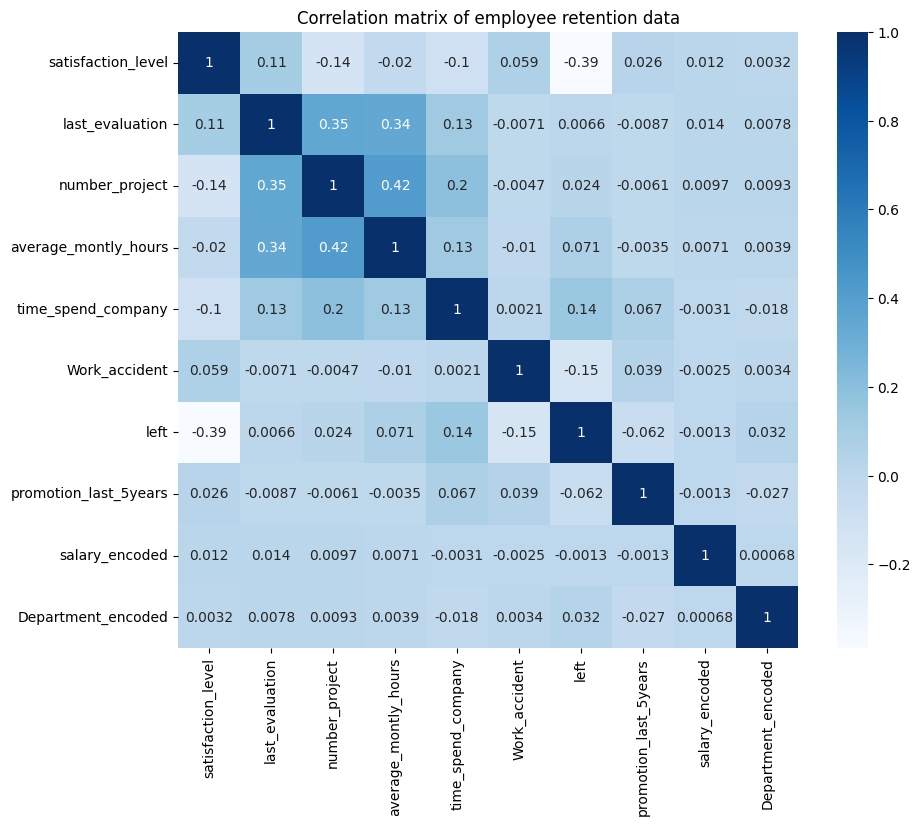

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='Blues')
plt.title('Correlation matrix of employee retention data')
plt.show()

In [12]:
df_numeric = pd.concat([df_numeric['left'], df_numeric.drop(columns=['left'])], axis=1)

In [13]:
X = df_numeric.iloc[:,1:]
y = df_numeric.iloc[:,0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
reg = LogisticRegression(max_iter=1000)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = reg.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)

In [19]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy Score:  0.7576666666666667
Recall Score:  0.22662889518413598
Precision Score:  0.46920821114369504
F1 Score:  0.30563514804202485
Confusion Matrix: 
 [[2113  181]
 [ 546  160]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



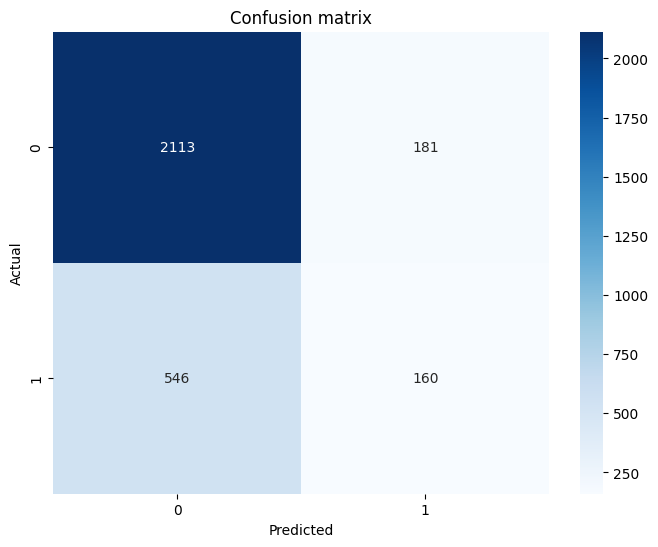

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()